# EXERCICE PANDA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("./sources/reduced_covid_sexe.csv")
df_met = pd.read_csv("./sources/metadata_covid_sexe.csv", sep=";", encoding="latin1")
# supprimons les deux premières lignes 
df.drop([0,1],axis=0,inplace=True)

pd.set_option('display.max_colwidth', None)


In [2]:
df.rename(columns={'Unnamed: 0': 'date'}, inplace = True)
df['date'] = pd.to_datetime(df['date'])

print(df.columns[0])
# inplace permet de ne pas avoir à écrire df = df.drop(), car par défaut la méthode 
# crée une copie du tableau et ne remplace rien


# Afficher les 15 premières lignes du tableau covid_sexe.csv. (df.head?)
print(df.head(15))


date
         date     hosp   hosp.1  hosp.2     rea   rea.1   rea.2      rad  \
2  2020-03-18   2972.0   1685.0  1248.0   771.0   525.0   239.0    816.0   
3  2020-03-19   4073.0   2256.0  1632.0  1002.0   689.0   284.0   1180.0   
4  2020-03-20   5226.0   2912.0  2134.0  1297.0   905.0   362.0   1587.0   
5  2020-03-21   5900.0   3298.0  2401.0  1453.0  1018.0   401.0   1811.0   
6  2020-03-22   6954.0   3906.0  2815.0  1674.0  1176.0   461.0   2117.0   
7  2020-03-23   8673.0   4882.0  3532.0  2080.0  1465.0   569.0   2567.0   
8  2020-03-24  10163.0   5843.0  4149.0  2503.0  1773.0   694.0   3281.0   
9  2020-03-25  12072.0   7064.0  4856.0  2935.0  2127.0   785.0   4085.0   
10 2020-03-26  13879.0   8152.0  5570.0  3351.0  2437.0   888.0   4947.0   
11 2020-03-27  15701.0   9288.0  6248.0  3758.0  2735.0   991.0   5698.0   
12 2020-03-28  17580.0  10400.0  6995.0  4236.0  3105.0  1097.0   6624.0   
13 2020-03-29  19311.0  11470.0  7643.0  4592.0  3397.0  1162.0   7131.0   
14 2020

In [3]:
# Afficher les 15 dernières lignes du tableau covid_sexe.csv. (df.tail?)

print(df.tail(15))

           date     hosp  hosp.1  hosp.2    rea  rea.1  rea.2       rad  \
1096 2023-03-17  13279.0  5982.0  7058.0  755.0  461.0  285.0  858444.0   
1097 2023-03-18  13205.0  5973.0  6995.0  752.0  462.0  282.0  858672.0   
1098 2023-03-19  13211.0  5979.0  6995.0  754.0  463.0  283.0  858680.0   
1099 2023-03-20  13358.0  6052.0  7068.0  760.0  469.0  282.0  859128.0   
1100 2023-03-21  13434.0  6083.0  7109.0  761.0  463.0  289.0  859586.0   
1101 2023-03-22  13418.0  6088.0  7090.0  761.0  469.0  283.0  860128.0   
1102 2023-03-23  13025.0  5912.0  6870.0  739.0  456.0  273.0  860867.0   
1103 2023-03-24  13103.0  5937.0  6917.0  751.0  466.0  275.0  861310.0   
1104 2023-03-25  13038.0  5902.0  6890.0  744.0  463.0  271.0  861538.0   
1105 2023-03-26  13036.0  5903.0  6889.0  746.0  466.0  270.0  861565.0   
1106 2023-03-27  13113.0  5950.0  6923.0  728.0  457.0  263.0  861972.0   
1107 2023-03-28  13178.0  6000.0  6943.0  720.0  452.0  261.0  862458.0   
1108 2023-03-29  13184.0 

In [4]:
# Afficher les dataframe du metadata_sexe ? à quoi sert il ?

print(df_met)


    Colonne          Type   \
0       dep        integer   
1      sexe        integer   
2      jour  string($date)   
3      hosp        integer   
4       rea        integer   
5       rad        integer   
6        dc        integer   
7  ssr_usld        integer   
8  hospconv        integer   
9   autres         integer   

                                                                   Description_FR  \
0                                                                    DÃ©partement   
1                                                                           Sexe    
2                                                           Date de notification    
3                                  Nombre de personnes actuellement hospitalisées   
4  Nombre de personnes actuellement en services de réanimation ou soins intensifs   
5                                Nombre cumulé de personnes retournées à domicile   
6                                 Nombre cumulé de personnes décédées à l'

In [5]:
# Quelle est la période temporelle sur laquelle s'étendent les données ?

# afficher le dates : 
# dates = df[2:]['Unnamed: 0']
# dans ce cas, la mémoire va d’abord charger les lignes puis filtrer les colonnes

dates = df['date'][2:]
# cette façon de faire est plus optimisée, puisqu’on va d’abord charger la colonne puis filtrer les lignes
print(dates)

# >>> 18 mars 2020 au 31 mars 2023, soit 1109 jours 

4      2020-03-20
5      2020-03-21
6      2020-03-22
7      2020-03-23
8      2020-03-24
          ...    
1106   2023-03-27
1107   2023-03-28
1108   2023-03-29
1109   2023-03-30
1110   2023-03-31
Name: date, Length: 1107, dtype: datetime64[ns]


In [6]:
# sur combien de jours s’étendent les données ? Cb d’années ?
print(f"{3*365 + (31-17)} jours")

#comme en numpy
print(dates.shape[0])

1109 jours
1107


C:\Users\poulp\AppData\Local\Temp\ipykernel_8324\2961646758.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hm = df.corr()


         hosp  hosp.1  hosp.2    rea  rea.1  rea.2    rad  rad.1  rad.2  \
hosp    100.0    99.0    99.0   75.0   74.0   73.0    4.0    4.0    5.0   
hosp.1   99.0   100.0    97.0   81.0   81.0   78.0   -5.0   -5.0   -4.0   
hosp.2   99.0    97.0   100.0   68.0   67.0   67.0   12.0   12.0   13.0   
rea      75.0    81.0    68.0  100.0  100.0   98.0  -39.0  -39.0  -39.0   
rea.1    74.0    81.0    67.0  100.0  100.0   96.0  -43.0  -42.0  -43.0   
rea.2    73.0    78.0    67.0   98.0   96.0  100.0  -29.0  -29.0  -30.0   
rad       4.0    -5.0    12.0  -39.0  -43.0  -29.0  100.0  100.0  100.0   
rad.1     4.0    -5.0    12.0  -39.0  -42.0  -29.0  100.0  100.0  100.0   
rad.2     5.0    -4.0    13.0  -39.0  -43.0  -30.0  100.0  100.0  100.0   
dc        6.0    -2.0    14.0  -32.0  -37.0  -20.0   98.0   98.0   98.0   
dc.1      6.0    -2.0    14.0  -32.0  -37.0  -20.0   98.0   98.0   98.0   
dc.2      6.0    -2.0    14.0  -32.0  -37.0  -21.0   98.0   98.0   98.0   

           dc   dc.1   d

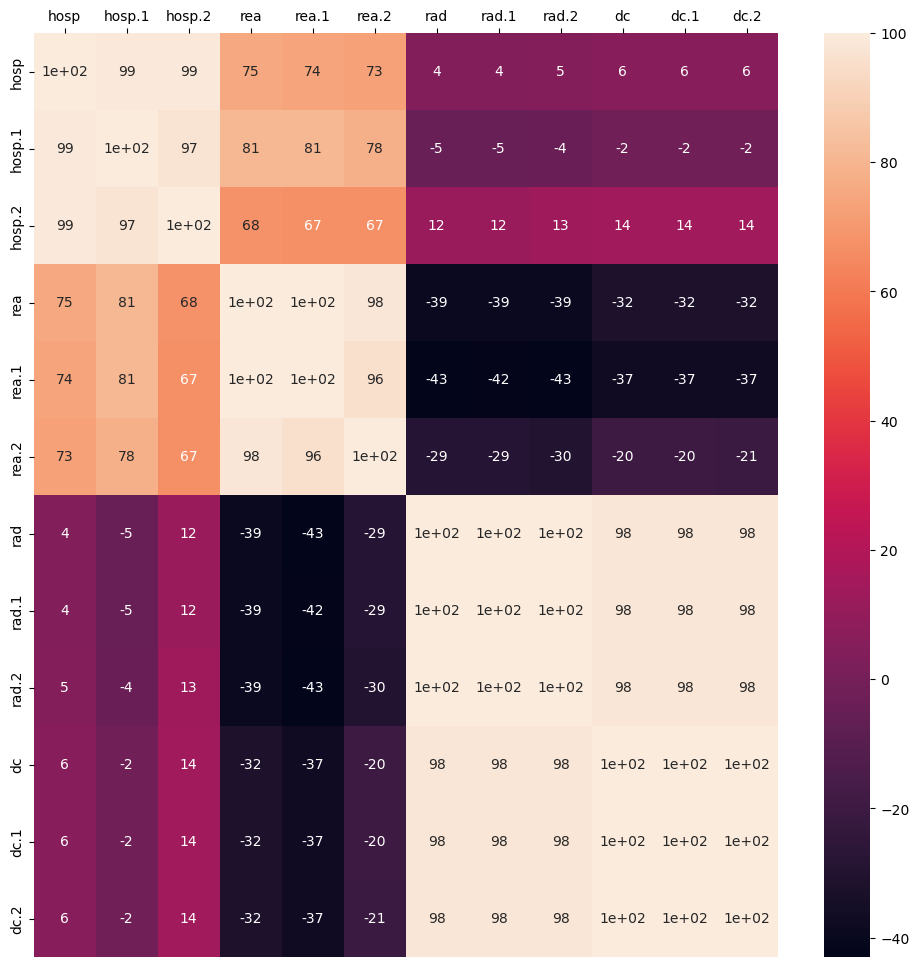

In [7]:
# Dessiner un Heatmap des corrélations des caractéristiques qui vous semblent pertinentes d'observer ? Discuter les résultats
# on va se servir de Seaborn, une librairie de visualisation de données

import seaborn as sns

hm = df.corr()
hmr = np.round(hm, 2) * 100
print(hmr)

plt.figure(figsize=(12,12))
heatmap:plt.axes = sns.heatmap(hmr, annot=True)
heatmap.xaxis.tick_top()


Ce qui est remarquable :
- le nombre de personnes qui retournent à leur domicile est très lié au nbr de personnes qui décèdent à l’hôpital.
- le rapport entre décès et hommes en réa est étrangement plus intense que pour les femmes

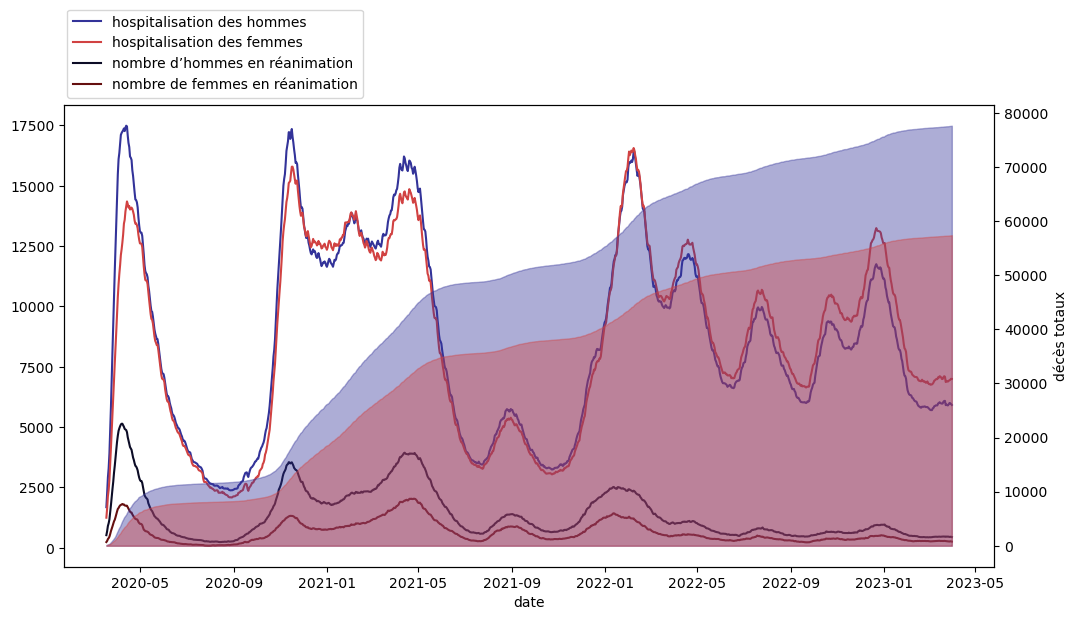

In [8]:
# Tracer l'evolution sur un même graphique des hospitalisations et des réanimations, pour les Femmes et pour les hommes. Discuter les résultats

cols = ['hosp.1', 'hosp.2', 'rea.1', 'rea.2']
colors = ['#333399', '#D14242', '#0C0C26', '#650F0F']
labels = [
    'hospitalisation des hommes',
    'hospitalisation des femmes',
    'nombre d’hommes en réanimation',
    'nombre de femmes en réanimation'
]

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('date')
for c, col, lab in zip(cols, colors, labels) :
    ax.plot(df['date'],
            df[c], 
            color=col, 
            label=lab
            )


fig.legend(bbox_to_anchor=(0.38,1.05)) # afficher la légende

# ––– ajout des décès sur un axe seecondaire ––– #

ax2 = ax.twinx()
ax2.set_ylabel('décès totaux')
ax2.fill_between(df['date'],df['dc.1'], color = colors[0], alpha = 0.4)
ax2.fill_between(df['date'],df['dc.2'], color = colors[1], alpha = 0.4)

# ––– fin ––– #
plt.show()


In [9]:
# Quelle est la probabilité pour un Français (vs) une Française de mourir du Covid :
# au début de la période disponible ?
# à la fin de la période disponible ?

# Si proba = nb morts à l’hosto / nb personnes à l’hosto ??

start_period = df[['dc.1','dc.2']][:30:5]
end_period = df[['dc.1','dc.2']][:df.shape[0]-30:-5]

def probamort(period):
    res =  pd.DataFrame({
        'proba_start_h': period['dc.1'] / 68000000 * 0.484,
        'proba_start_f': period['dc.2'] / 68000000 * 0.516,
        'surmort_h': period['dc.1'] - period['dc.2']
    })
    res['proba_surmort_h'] = (res['surmort_h'] / 68000000)

    return res

print(probamort(start_period))
print(probamort(end_period))

# je ne sais pas trop ce que ces données veulent dire haha

    proba_start_h  proba_start_f  surmort_h  proba_surmort_h
2    8.612353e-07   7.284706e-07       25.0     3.676471e-07
7    3.537471e-06   2.655882e-06      147.0     2.161765e-06
12   9.779647e-06   7.034294e-06      447.0     6.573529e-06
17   1.969453e-05   1.297588e-05     1057.0     1.554412e-05
22   3.062012e-05   2.074624e-05     1568.0     2.305882e-05
27   3.977341e-05   2.725694e-05     1996.0     2.935294e-05
      proba_start_h  proba_start_f  surmort_h  proba_surmort_h
1110       0.000553       0.000435    20245.0         0.000298
1105       0.000552       0.000435    20223.0         0.000297
1100       0.000552       0.000435    20213.0         0.000297
1095       0.000551       0.000434    20195.0         0.000297
1090       0.000551       0.000434    20189.0         0.000297
1085       0.000550       0.000433    20192.0         0.000297


Bonus (à ajuster en fonction de votre vitesse d'exécution ;) :

1. Retrouver le tableau de donnée "reduced_covid_sexe.csv" à partir des données csv officielle disponible sur le site de data.gouv.fr (pd.groupby?, et pd.unstack?)
    - data - par sexe https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7
    - metadata : https://www.data.gouv.fr/fr/datasets/r/3f0f1885-25f4-4102-bbab-edec5a58e34a
    - \

2. Tracer un histogramme permettant de visualiser quelles sont les régions ou la probabilité de mourir du covid en France est la plus élevé ?

3. Quelles sont les 3 régions les plus dangereuses ? les 3 les moins dangereuses ?

4. Tracer les probabilités d'hospitalisation/réanimation/décès du covid par tranche d'âge
    - data - par age (and +): https://www.data.gouv.fr/fr/datasets/r/e3d83ab3-dc52-4c99-abaf-8a38050cc68c

In [21]:
# Refaire le tableau

df_brut = pd.read_csv("./sources/brut_data.csv",sep=';')
# filtrage données superflues
filter = df_brut.head(1000).drop(['HospConv', 'SSR_USLD', 'autres', 'dep'],axis=1)
# grouper par jours en concervant l’infos sur les sexes
df_by_jours = filter.groupby(['jour', 'sexe']).sum()
# transposer les données par sexes sur les colonnes
df_by_jours = df_by_jours.unstack('sexe')
# retravailler l’index pour une meilleure présentation
df_by_jours = df_by_jours.reset_index()
df_by_jours.columns = [f'{c[0]}{c[1]}' for c in df_by_jours.columns]

print(df_by_jours)



         jour  hosp0  hosp1  hosp2  rea0  rea1  rea2  rad0  rad1  rad2  dc0  \
0  2020-03-18   2972   1685   1248   771   525   239   816   432   379  218   
1  2020-03-19   4073   2256   1632  1002   689   284  1180   580   562  327   
2  2020-03-20   5226   2912   2134  1297   905   362  1587   777   764  450   
3  2020-03-21    715    350    289   174   108    49   383   169   199   65   

   dc1  dc2  
0  121   96  
1  179  136  
2  250  190  
3   39   22  


In [12]:
# morts par région et par jours

# filtrage des données : on ne garde que les décès
df_dc = df_brut.drop(['hosp', 'rea', 'rad', 'HospConv', 'SSR_USLD', 'autres'],axis=1)
# second filtrage : on ne garde que les décès totaux, pas besoin de faire la différence entre hommes et femmes
df_dc = df_dc[df_dc['sexe'] == 0]
# supprime la colonne sexe devenue inutile
df_dc = df_dc.drop(['sexe'],axis=1)
# grouper les infos sur chaque jour
df_dc = df_dc.groupby(['jour','dep']).sum() # j’aimerais ne pas asvoir a mettre .sum()
# créer des colonnes pour chaque département (tu veux tester mon crew mais tu vas faire comment ?)
df_dc = df_dc.unstack('dep')
# rajouter un index numérique par ce que je le vaut bien
df_dc = df_dc.reset_index()
# combiner le multi index en une seule ligne par ce qu’on est quand même mieux ensuite
df_dc.columns = df_dc.columns.to_series().apply(''.join)

print(df_dc)

            jour  dc01  dc02  dc03  dc04  dc05  dc06  dc07  dc08  dc09  ...  \
0     2020-03-18     0    11     0     0     0     2     0     0     0  ...   
1     2020-03-19     0    19     0     0     0     2     0     0     0  ...   
2     2020-03-20     0    24     0     0     0     4     1     0     0  ...   
3     2020-03-21     0    25     0     0     0     6     1     0     0  ...   
4     2020-03-22     0    28     0     0     0     7     1     0     0  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
1104  2023-03-27   841  1640   940   394   412  2659   675   555   254  ...   
1105  2023-03-28   841  1640   939   394   412  2659   675   555   254  ...   
1106  2023-03-29   841  1640   939   394   412  2659   675   555   254  ...   
1107  2023-03-30   841  1640   939   394   412  2660   675   555   254  ...   
1108  2023-03-31   841  1642   939   394   412  2660   675   555   254  ...   

      dc92  dc93  dc94  dc95  dc971  dc972  dc973  